In [18]:
from numpy import mean
from numpy import cov
from numpy.linalg import eig
import math
import operator

In [2]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

RuntimeError: module compiled against API version 0xc but this version of numpy is 0xb

RuntimeError: module compiled against API version 0xc but this version of numpy is 0xb

In [3]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

('x_train shape:', (60000, 28, 28), 'y_train shape:', (60000,))


In [4]:
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

('x_test shape:', (10000, 28, 28), 'y_test shape:', (10000,))


In [5]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

6000


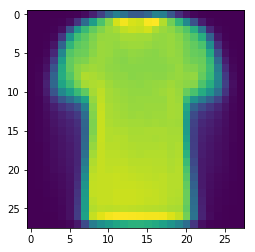

6000


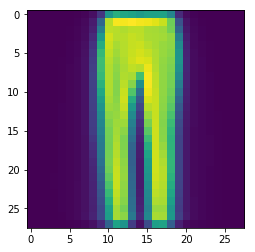

6000


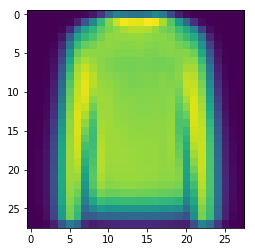

6000


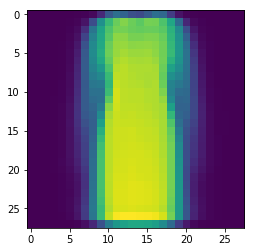

6000


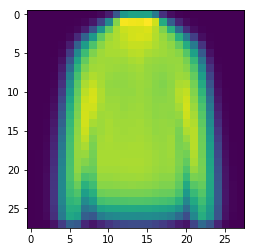

6000


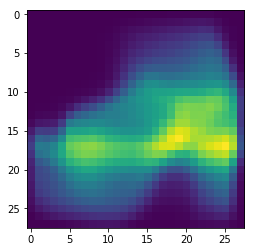

6000


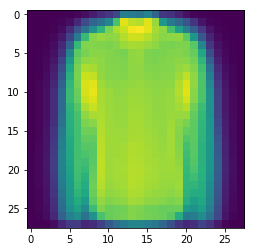

6000


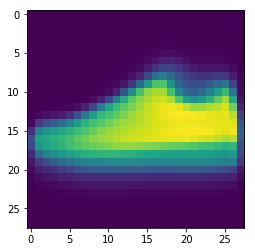

6000


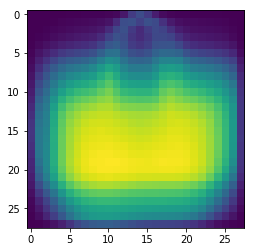

6000


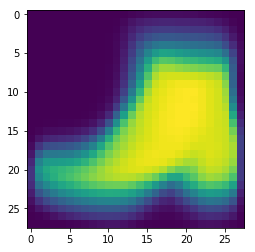

In [6]:
#Calculate mean image of each class
mean_values = np.zeros((10, 28,28))
for a in range(10):
    c = 0
    for i in range(60000):
        if y_train[i] == a:
            mean_values[a] = mean_values[a] + x_train[i]
            c = c + 1
    print(c)
    mean_values[a] = mean_values[a].astype('float32') / c
    #print(mean_values[a])
    plt.imshow(mean_values[a])
    plt.show()

6000


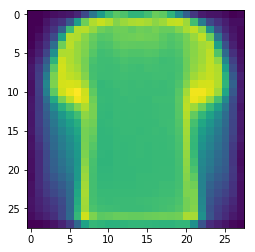

6000


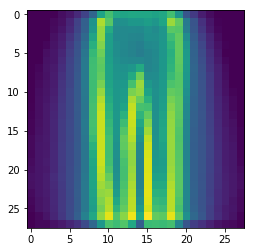

6000


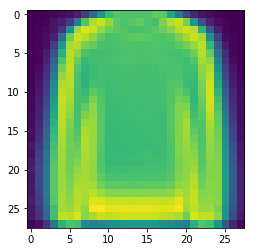

6000


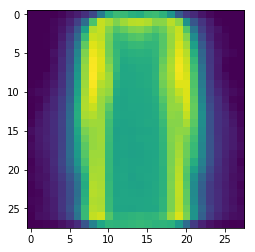

6000


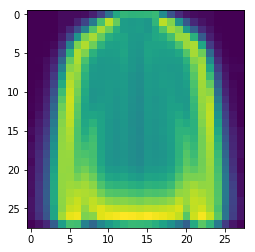

6000


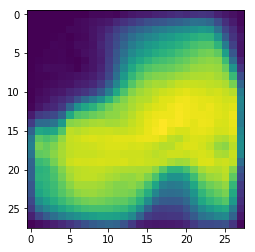

6000


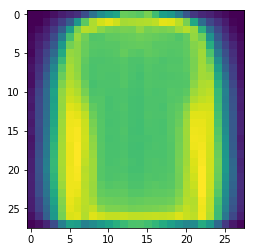

6000


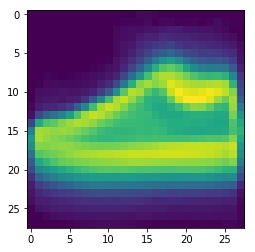

6000


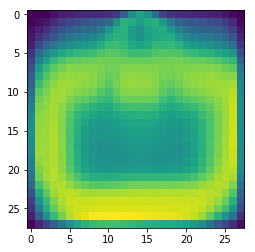

6000


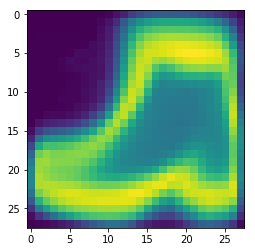

In [7]:
#Calculate std image of each class
std_values = np.zeros((10, 28, 28))
for a in range(10):
    c = 0;
    for i in range(60000):
        if y_train[i] == a:
            std_values[a] = std_values[a] + (x_train[i] - mean_values[a])*(x_train[i] - mean_values[a])
            c = c + 1
    print(c)
    std_values[a] = std_values[a].astype('float32') / c
    std_values[a] = np.sqrt(std_values[a])
    plt.imshow(std_values[a])
    plt.show()

In [8]:
#converted 0 standard deviation to 1 to deal with NaN values while normalization
std_values_exp = std_values
for a in range(10):
    std_values_exp[std_values_exp == 0.0] = 1.0
print(std_values[y_train[0]])

[[  1.00000000e+00   1.23355759e-03   1.23355759e-03   1.23355759e-03
    1.50387591e-03   1.50811329e-03   1.51230241e-03   1.51651512e-03
    1.53894456e-03   1.74671830e-03   6.95837719e-03   1.86758867e-02
    3.89230863e-02   6.81392976e-02   9.04475530e-02   1.03964722e-01
    1.12741310e-01   1.15677523e-01   1.16332740e-01   1.12154911e-01
    1.09849238e-01   1.01237354e-01   8.98822671e-02   7.91495643e-02
    6.36912238e-02   5.19017970e-02   3.03094500e-02   1.17697142e-02]
 [  2.86343158e-04   1.27828903e-03   1.27828903e-03   1.27828903e-03
    1.54073229e-03   1.53491837e-03   1.53821503e-03   1.57018429e-03
    1.64107102e-03   8.90616955e-03   2.27701552e-02   4.93835615e-02
    1.07654151e-01   1.61312414e-01   1.97473605e-01   2.18665941e-01
    2.31347172e-01   2.37849759e-01   2.36594460e-01   2.35450645e-01
    2.34516872e-01   2.30500502e-01   2.20042912e-01   2.02893685e-01
    1.73705797e-01   1.31922347e-01   7.90247780e-02   2.95412550e-02]
 [  2.86343158e-04

In [9]:
#normalising data
x_train_norm = np.zeros((60000, 28, 28))
for i in range(60000):
    x_train_norm[i] = (x_train[i] - mean_values[y_train[i]]).astype('float32') / std_values_exp[y_train[i]]
print(x_train_norm)
print(x_train_norm[0][0][0], "----")

[[[ 0.         -0.0233132  -0.0233132  ..., -0.12004824 -0.08580339
   -0.03387447]
  [-0.01826046 -0.02761044 -0.02761044 ..., -0.22643543 -0.15003981
   -0.07602086]
  [-0.01826046 -0.02684089 -0.02684089 ..., -0.33575269 -0.22737776
   -0.13171025]
  ..., 
  [-0.17206077 -0.28795631 -0.37753463 ..., -0.52916841 -0.42304504
   -0.23350064]
  [-0.06932001 -0.12492175 -0.19558657 ..., -0.36311307 -0.28047962
   -0.14723724]
  [-0.06788529 -0.05448999 -0.05281661 ..., -0.20965327 -0.1547734
   -0.06346298]]

 [[-0.01460749 -0.04784361 -0.08456947 ..., -0.04805796 -0.04375126
   -0.01405572]
  [-0.02643673 -0.05867953 -0.05467679 ..., -0.06219044 -0.02959162
   -0.02009504]
  [-0.04982981 -0.03853884 -0.05888978 ..., -0.08860033 -0.04156497
   -0.02401482]
  ..., 
  [-0.04086904 -0.05305552 -0.07424599 ..., -0.08154412 -0.06128796
   -0.03870177]
  [-0.02650289 -0.03616652 -0.05986373 ..., -0.06792375 -0.04930013
   -0.02782456]
  [-0.0212337  -0.03649272 -0.05018964 ..., -0.05689636 -0.

In [10]:
#PCA
x_train_norm_flat = x_train_norm.flatten().reshape(60000, 784)
A = x_train_norm_flat
M = mean(x_train_norm_flat.T, axis=1)
C = A - M
V = cov(C.T)
values, vectors = eig(V)
print(vectors)
print("------")
print(values)
print("------")
P = vectors.T.dot(C.T)
print(P.T)

[[ -4.22780328e-04  -3.82652817e-03   2.07873072e-03 ...,  -1.04827720e-03
   -3.55484218e-04   7.79456803e-05]
 [ -2.84459516e-03  -1.86898464e-02   7.24474945e-03 ...,  -1.51644367e-02
    4.90875750e-03   5.56063518e-04]
 [ -2.95101645e-03  -1.82475540e-02   8.80514700e-03 ...,   5.13359169e-03
   -1.88703571e-02   7.06272913e-03]
 ..., 
 [ -1.10552811e-02  -2.90795797e-02   4.94802733e-02 ...,  -3.98786963e-02
   -8.74334216e-03   3.19983292e-02]
 [ -7.72181096e-03  -2.44693688e-02   4.00913170e-02 ...,   4.77004179e-02
    2.85933486e-02  -3.14656791e-02]
 [ -4.41845486e-03  -1.80993174e-02   2.23316321e-02 ...,  -3.46502349e-02
   -1.19238353e-02   1.24370247e-02]]
------
[  1.46689495e+02   5.94793719e+01   4.15161268e+01   2.98220443e+01
   2.44002673e+01   1.90960011e+01   1.83190678e+01   1.48995356e+01
   1.25606229e+01   1.22201977e+01   1.07115700e+01   9.67363052e+00
   9.09120989e+00   7.87844274e+00   7.14980403e+00   6.85432135e+00
   6.48651495e+00   6.45029947e+00   

[ 146.68949492  206.16886679  247.68499358  277.50703785  301.90730519
  321.00330625  339.32237409  354.22190966  366.7825326   379.00273025
  389.71430023  399.38793074  408.47914063  416.35758337  423.5073874
  430.36170875  436.8482237   443.29852317  449.43290782  455.07735362
  460.4465248   465.66421549  470.41801912  475.14327253  479.58510934
  483.91474296  488.04050953  491.91738633  495.76243319  499.49321251
  503.09889444  506.59499306  510.07047979  513.2274938   516.29748221
  519.33170887  522.29821107  525.20706664  528.07552809  530.86624876
  533.59479318  536.26337208  538.84776785  541.40389851  543.87854351
  546.30924304  548.71565695  551.03249952  553.28975997  555.51435966
  557.69873282  559.84195991  561.95952473  564.04643502  566.06553373
  568.04689872  570.01109652  571.9565465   573.81432565  575.65229115
  577.44857356  579.2030069   580.95458818  582.64676701  584.32095196
  585.96491612  587.58686153  589.15443505  590.70786016  592.24037999
  593.7

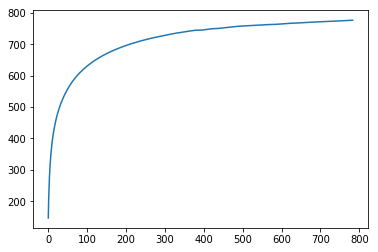

In [11]:
#plotting cummulative sum of eigenvalues vs no. of eigenvalues to see cutoff for no. of principal components
cumm_sum = np.zeros((784))
till_now = 0.0
for i in range(784):
    cumm_sum[i] = till_now + values[i]
    till_now = till_now + values[i]
no_of_eigenvalues = range(784)
print(cumm_sum)
plt.plot(no_of_eigenvalues, cumm_sum)
# plt.axis([0, 800, cumm_sum.min(), cumm_sum.max()])
plt.show()

6000


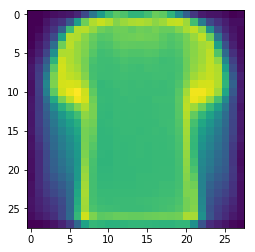

6000


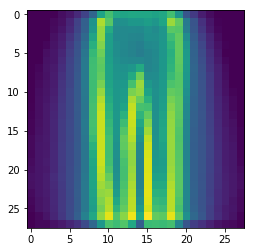

6000


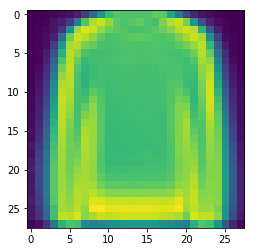

6000


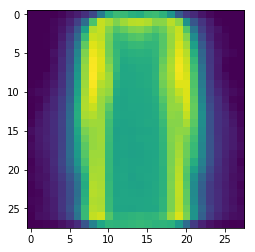

6000


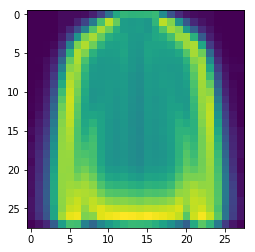

6000


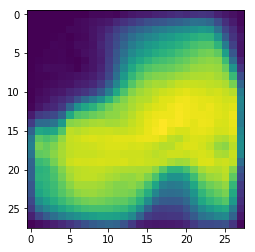

6000


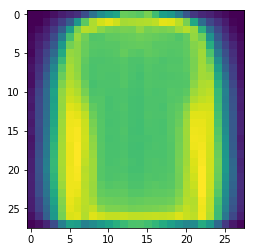

6000


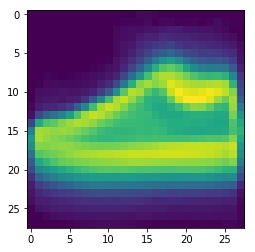

6000


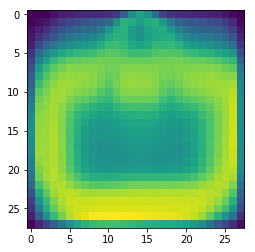

6000


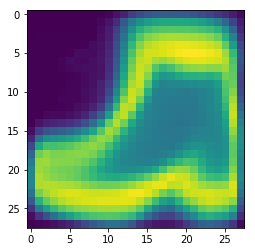

In [12]:
#Calculate std image(divide by N-1) of each class
std_values_naive = np.zeros((10, 28, 28))
for a in range(10):
    c = 0;
    for i in range(60000):
        if y_train[i] == a:
            std_values_naive[a] = std_values_naive[a] + (x_train[i] - mean_values[a])*(x_train[i] - mean_values[a])
            c = c + 1
    print(c)
    std_values_naive[a] = std_values_naive[a].astype('float32') / (c-1)
    std_values_naive[a] = np.sqrt(std_values_naive[a])
    plt.imshow(std_values_naive[a])
    plt.show()

In [ ]:
for each in x_test:
    x_test = x_test - mean_values[y_t]

In [26]:
mean_values_flat = mean_values.flatten().reshape(10, 784)
std_values_naive_flat = std_values_naive.flatten().reshape(10, 784)
#Calculating probability of a data instance for each class
def calculateprobability():
    for j in range(60000):
        l = np.ones((10))
        for a in range(10):
            for i in range(784):
                if std_values_naive_flat[a][i] != 0.0:
                    exponent = math.exp(-(math.pow(x_train_norm_flat[j][i] - mean_values_flat[a][i], 2) / (2 * math.pow(std_values_naive_flat[a][i], 2))))
                else:
                    exponent = math.exp(-(math.pow(x_train_norm_flat[j][i] - mean_values_flat[a][i], 2) / (2 * math.pow(1, 2))))
                term = (1 / (math.sqrt(2*math.pi) * std_values_naive_flat[a][i])) * exponent
                l[a] = l[a]*term
        index, value = max(enumerate(l), key=operator.itemgetter(1))
        print(l)
        print("Value =", value, "Class = ", index, "Original = ", y_train[j])

In [ ]:
calculateprobability()

/Users/architaggarwal/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]
/Users/architaggarwal/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan  

/Users/architaggarwal/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan  

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan  

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan  

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan  

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan  

('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan  

('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan  

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan  

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan  

('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan  

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan  

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan  

('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan  

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan  

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan  

('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan  

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan  

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan  

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan  

('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan  

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan  

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan  

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan  

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan  

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan  

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan  

('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan  

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan  

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan  

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan  

('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan  

('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan  

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan  

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan  

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan  

('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan  

('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan  

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan  

('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan  

('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan  

('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan  

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan  

('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan  

('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan  

('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan  

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan  

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan  

('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan  

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan  

('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan  

('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan  

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 9)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 4)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 8)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0

('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 3)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 0)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 5)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 1)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 6)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 7)
[  0.  nan  nan   0.  nan  nan   0.  nan   0.  nan]
('Value =', 0.0, 'Class = ', 0, 'Original = ', 2)
[  0.  nan  nan   0.  nan  nan  